### Μέλη Ομάδας:
Ον/μο1:  Καραβαγγέλης Αθανάσιος \\
Αρ. Μητρώου 1:  03117022

# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3 
Στην άσκηση αυτή θα υλοποιηθούν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αυτόματη αναγνώριση μεταξύ 3 μουσικών είδών απο τα δεδομένα που προσφέρει η υπηρεσία Spotify. Συγκεκριμένα, θα δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα μουσικά χαρακτηριστικά κάθε κομματιού (όπως dancability, acousticness κ.α.) και $y_i$ είναι το είδος του κομματιού - ένας ακέραιος στο $[0,2]$. Σε κάθε περίπτωση καλείστε να σχεδιάσετε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,2]}$$

# 1ο Μέρος: Αξιολόγηση
Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα χρησιμοποιηθούν στα επόμενα μέρη.

Παρακάτω σας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές με τη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong), και υπολογίζει τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό καλείστε να υλοποιήσετε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένων}$$



In [66]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self, y_true, y_pred, x):
        self.y_true = y_true
        self.y_pred = y_pred
        self.x = x

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred
      
      ##################
      ## Your code below
      real_length = len(y_true)
      pred_length = len(y_pred)

      assert real_length == pred_length
      corrects=0
      for i in range(pred_length):
        corrects += (y_true[i] == y_pred[i])

      acc = corrects / pred_length
      ## Your code above
      ##################
      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision": precision, "recall": recall, "f1": f1, "accuracy": self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 
    
    def get_sample_of_wrong(self):
        wrong_indexes = [index for index in range(len(self.y_true)) if self.y_true[index] != self.y_pred[index]]
        print("\n{:<9} {:<100} {:<9} {:<9}".format("Index","Features","Labeled","Predicted"))
        for i in wrong_indexes:
          print("{:<9} {:<100} {:<9} {:<9}".format(i,self.x[i], self.y_true[i], self.y_pred[i]))


    def get_evaluation_report(self, analytic=True):
        metrics = self.get_metrics()
        for m in metrics:
            print(m + ': ' + str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)
        if analytic:
          self.get_sample_of_wrong()

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν τα δεδομένα από το dataset

In [68]:
y_true = [1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 1, 1, 0, 0]
x = np.random.rand(8)

eval = Evaluate(y_true, y_pred,x)
eval.get_evaluation_report(analytic=False)

precision: 0.75
recall: 0.75
f1: 0.75
accuracy: 0.75
Confusion matrix: 
[[3 1]
 [1 3]]


# Dataset

To dataset που σας δίνεται περιέχει πληθώρα μουσικών κομματιών για τα οποία έχουν καταγραφεί διάφορα χαρακτηριστικά τους, όπως επίσης και το μουσικό είδος στο οποίο ανήκουν. Στη συγκεκριμένη άσκηση θα δουλέψουμε με ένα υποσύνολο (αριθμητικών) χαρακτηριστικών, τα οποία συνεισφέρουν στον καθορισμό της μουσικής κατηγορίας κάθε κομματιού.  

Τα χαρακτηριστικά τα οποία θα μελετήσουμε στην παρούσα άσκηση είναι τα "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", ενώ οι κατηγορίες στις οποίες καλούμαστε να ταξινομήσουμε τα μουσικά κομμάτια είναι οι "Electronic", "Rock", και "Rap".  


In [3]:
# Σύνδεση του Google Colab με το Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Θα χρησιμοποιήσουμε τα DataFrames της βιβλιοθήκης pandas για να χειριστούμε τα δεδομένα μας. Μπορείτε να βρείτε περισσότερες πληροφορίες για τα pandas DataFrames στο αντίστοιχο [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [4]:
import pandas as pd
from tqdm.notebook import tqdm 

In [5]:
# read data in the form of pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/ai-ntua/music_df_processed.csv")
# print the first 5 values of the DataFrame using .head() command
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [6]:
# What can we see here?
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


## Επιλογή χαρακτηριστικών x και στόχων y.  

Για λόγους απλότητας επιλέγουμε τα χαρακτηριστικά (inputs) και τις κατηγορίες-στόχους (genres). Καλείστε να διαχωρίσετε τα δεδομένα σε train/test set. Ας θεωρήσουμε το διαχωρισμό 30% - test set, 70% - train set.

In [7]:
from sklearn.model_selection import train_test_split
# χαρακτηριστικά
inputs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]

# κατηγορίες-στόχοι
output = "music_genre"
genres = ["Electronic", "Rock", "Rap"]

# φιλτράρουμε το DataFrame ώστε να διατηρήσουμε μόνο τις 3 κατηγορίες που μας ενδιαφέρουν.
data = data[data[output].isin(genres)]

# dictionary to map genre to label id 
genres_to_id = {genre: i for i, genre in enumerate(genres)}

#keep only the columns that we need
data = data[inputs+[output]]

data.music_genre = data.music_genre.map(genres_to_id)

# εδώ πρέπει να διαχωρίσετε τα δεδομένα σε train (70% των δεδομένων)/test set (30% των δεδομένων)
# ονομάστε τις μεταβλητές ως εξής:
# τα χαρακτηριστικά του train set: x_train
# τις κατηγορίες-στόχους του train set: y_train
# τα χαρακτηριστικά του test set: x_test
# τις κατηγορίες-στόχους του test set: y_test
# x_test, y_test, x_train, y_train = [], [], [], []
##################
## Your code below

features = data.iloc[:, :6].values
labels = data.iloc[:,[6]].values

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

## Your code above
##################

## Μορφή των δεδομένων  

Βεβαιωθείτε ότι τα δεδομένα σας έχουν τη σωστή μορφή εκτυπώνοντας τον αριθμό γραμμών και στηλών για τα x_test, y_test, x_train, y_train.

In [8]:
# Shape of x_test, y_test, x_train, y_train

##################
## Your code below

print("x_test shape:\t", x_test.shape)
print("y_test shape:\t",y_test.shape)
print("x_train shape:\t", x_train.shape)
print("y_train shape:\t",y_train.shape)

## Your code above
##################

x_test shape:	 (4060, 6)
y_test shape:	 (4060, 1)
x_train shape:	 (9471, 6)
y_train shape:	 (9471, 1)


Αναφορικά με τις τιμές των χαρακτηριστικών, είναι σημαντικό να γνωρίζουμε το εύρος τους, δηλαδή τη μέγιστη και την ελάχιστη τιμή που λαμβάνει το κάθε χαρακτηριστικό. Εξερευνήστε το εύρος του κάθε χαρακτηριστικού στα train και test set. 

In [9]:
# Range of x_train, x_test columns
##################
## Your code below
from prettytable import PrettyTable
t = PrettyTable(['Feature', 'Range in x_train', 'Range in x_test', 'Maximum in x_train' ,'Maximum in x_test', 'Minimum in x_train', 'Minimum in x_test'])

for column in range(6):
  t.add_row([data.columns[column], x_train[column].max() - x_train[column].min(), x_test[column].max() - x_test[column].min(), x_train[column].max(), x_test[column].max(), x_train[column].min(), x_test[column].min()])
print(t)

## Your code above
##################

+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|     Feature      |  Range in x_train  |  Range in x_test   | Maximum in x_train | Maximum in x_test  | Minimum in x_train | Minimum in x_test |
+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|   acousticness   |      0.861353      | 0.8841999999999999 |       0.862        | 0.9079999999999999 |      0.000647      |       0.0238      |
|   danceability   |     0.77699672     | 0.6990000000000001 |       0.777        | 0.6990000000000001 |      3.28e-06      |        0.0        |
|      energy      |        0.64        |      0.946308      |        0.64        | 0.9470000000000001 |        0.0         |      0.000692     |
| instrumentalness | 0.8639919400000001 |       0.7222       | 0.8640000000000001 |       0.752        |      8.06e-06      

Από την παραπάνω ανάλυση προκύπτουν κάποια ερωτήματα σημαντικά για τα επόμενα βήματα:
- Έχουν τα χαρακτηριστικά μας περίπου το ίδιο εύρος;
> Nαι , τα χαρακτηριστικά μας έχουν παρόμοιο εύρος, συγκεκριμένα από 0.64 έως 0..93 .
- Σε πολλές εφαρμογές είναι σημαντικό τα χαρακτηριστικά να βρίσκονται στο εύρος [0, 1]. Ισχύει αυτό στην περίπτωσή μας; 
> Ναι. Αν παρατηρήσουμε τις min/max τιμές βλέπουμε ότι βρίσκονται για όλα τα χαρακτηριστικά στο [0,1].

# 2o Μέρος: Υλοποίηση KNN
Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται ένα "φρέσκο" δείγμα ως διάνυσμα από χαρακτηριστικά $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστοιχεί στα χαρακτηριστικά ενός δείγματος από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στα 100 πρώτα δείγματα του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 2ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

 Σας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Καλείστε να συμπληρώσετε τον κώδικα που λείπει στις μεθόδους distance, get_knn, και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [119]:
from numpy import linalg
class KNN:
    def __init__(self, x, y, k, distance = "euclidean"):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance
        
    ## Compute the distance between the two vectors (2 rows of the DataFrame)
    # hint: use np.linalg.norm for eucledian
    # hint: use equation given above for cosine
    def get_distance(self, row1, row2):
      dist=0
      if self.distance=='euclidian':
        ##################
        ## Your code below
        dist = np.linalg.norm(row1 - row2)
        ## Your code above
        ##################
      elif self.distance=='cosine':
        ##################
        ## Your code below
        dist = 1 - (np.dot(row1, row2)/(np.linalg.norm(row1) * np.linalg.norm(row2))) 
        ## Your code above
        ##################

      return dist

    ## Given a DataFrame row as a vector, returns indexes of k nearest neighbors
    def get_knn(self, row):
      distances = list()
      x = self.x
      k = self.k
      
      ##################
      ## Your code below - populate the distances list
      # hint: you can use a for loop
      temp = len(x)
      distances = np.zeros(temp)
      for i in range(temp):
        distances[i] = self.get_distance(row, x[i])
      ## Your code above
      ##################

      # Sort distances, and return the indexes of k first elements
      ans_indexes = np.argsort(distances)[:k]
      return ans_indexes

    ## Given a DataFrame row as a vector, classify it according to KNN
    # hint: we have a list of k labels and want to return the most common one
    def classify(self, row):
      y = self.y
      nn_labels = [y[i] for i in self.get_knn(row)]
      
      ##################
      ## Your code below
      
      prediction = np.argmax(np.bincount(nn_labels))
      ## Your code above
      ###################
      return prediction


knn = KNN(x_train, y_train[:,0], k=5, distance='euclidian')

Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονωμένα δείγματα.

## Αξιολόγηση του KNN

In [120]:
preds = [knn.classify(list(x_test[i])) for i in range(100)]
print(preds)
labels = [y_test[i][0] for i in range(100)]

[0, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1]


In [121]:
def stringify(alist):
    string = " "
    for a in alist:
        string= string+str(a)+" "
    return string

x_test_string = [ "["+stringify(i)+"]" for i in x_test ]
eval = Evaluate(labels, preds, x_test_string)
eval.get_evaluation_report()

precision: 0.6567840567840568
recall: 0.6506659368728335
f1: 0.6513681634317957
accuracy: 0.65
Confusion matrix: 
[[19  8  2]
 [10 22  4]
 [ 4  7 24]]

Index     Features                                                                                             Labeled   Predicted
0         [ 0.0238 0.63 0.9079999999999999 0.5920000000000001 0.1159999999999999 0.0326 ]                      1         0        
2         [ 0.000692 0.512 0.9470000000000001 0.114 0.0283 0.0401 ]                                            1         0        
7         [ 0.00246 0.6940000000000001 0.615 0.0267 0.136 0.1159999999999999 ]                                 1         2        
11        [ 0.000356 0.7909999999999999 0.56 1.05e-06 0.107 0.23600000000000002 ]                              0         2        
14        [ 0.009770000000000001 0.593 0.5489999999999999 2.78e-06 0.132 0.0376 ]                              1         2        
15        [ 0.313 0.59 0.85 0.0 0.1159999999999999 0.0582 ]   

## Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

In [122]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

labels2 = [y_test[i][0] for i in range(100)]

eval = Evaluate(labels2, y_pred, x_test_string)
eval.get_evaluation_report()

precision: 0.6567840567840568
recall: 0.6506659368728335
f1: 0.6513681634317957
accuracy: 0.65
Confusion matrix: 
[[19  8  2]
 [10 22  4]
 [ 4  7 24]]

Index     Features                                                                                             Labeled   Predicted
0         [ 0.0238 0.63 0.9079999999999999 0.5920000000000001 0.1159999999999999 0.0326 ]                      1         0        
2         [ 0.000692 0.512 0.9470000000000001 0.114 0.0283 0.0401 ]                                            1         0        
7         [ 0.00246 0.6940000000000001 0.615 0.0267 0.136 0.1159999999999999 ]                                 1         2        
11        [ 0.000356 0.7909999999999999 0.56 1.05e-06 0.107 0.23600000000000002 ]                              0         2        
14        [ 0.009770000000000001 0.593 0.5489999999999999 2.78e-06 0.132 0.0376 ]                              1         2        
15        [ 0.313 0.59 0.85 0.0 0.1159999999999999 0.0582 ]   

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Σύγκριση υλοποιήσεων

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Βεβαιωθείτε πως προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και μετρήστε τους χρόνους εκτέλεσης.

In [130]:
knn = KNN(x_train, y_train[:,0], k=5, distance='euclidian')
preds = [knn.classify(list(x_test[i])) for i in range(100)]
print(preds)
labels = [y_test[i][0] for i in range(100)]
x_test_string = [ "["+stringify(i)+"]" for i in x_test ]
eval = Evaluate(labels, preds, x_test_string)
eval.get_evaluation_report()

[0, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1]
precision: 0.6567840567840568
recall: 0.6506659368728335
f1: 0.6513681634317957
accuracy: 0.65
Confusion matrix: 
[[19  8  2]
 [10 22  4]
 [ 4  7 24]]

Index     Features                                                                                             Labeled   Predicted
0         [ 0.0238 0.63 0.9079999999999999 0.5920000000000001 0.1159999999999999 0.0326 ]                      1         0        
2         [ 0.000692 0.512 0.9470000000000001 0.114 0.0283 0.0401 ]                                            1         0        
7         [ 0.00246 0.6940000000000001 0.615 0.0267 0.136 0.1159999999999999 ]                                 1         2        
11        [ 0.000356 0.

### Για τους χρόνους εκτέλεσης για k = 5 τρέχουμε τα 3 παρακάτω κελιά:

In [134]:
%%time
knn = KNN(x_train, y_train[:,0], k=5, distance='euclidian')
preds_5_euclidean = [knn.classify(list(x_test[i])) for i in range(100)]
labels = [y_test[i][0] for i in range(100)]

CPU times: user 10.1 s, sys: 881 ms, total: 11 s
Wall time: 10.1 s


In [136]:
eval = Evaluate(labels, preds_5_euclidean, x_test_string)
eval.get_evaluation_report(analytic=False)

precision: 0.6567840567840568
recall: 0.6506659368728335
f1: 0.6513681634317957
accuracy: 0.65
Confusion matrix: 
[[19  8  2]
 [10 22  4]
 [ 4  7 24]]


In [137]:
%%time
knn = KNN(x_train, y_train[:,0], k = 5, distance = 'cosine')
preds_5_cosine = [knn.classify(list(x_test[i])) for i in range(100)]

CPU times: user 18.8 s, sys: 1.42 s, total: 20.3 s
Wall time: 18.8 s


In [138]:
eval = Evaluate(labels, preds_5_cosine, x_test_string)
eval.get_evaluation_report(analytic=False)

precision: 0.6488670488670489
recall: 0.6436416712278782
f1: 0.6414107631498935
accuracy: 0.64
Confusion matrix: 
[[20  7  2]
 [12 20  4]
 [ 5  6 24]]


In [141]:
%%time
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train[:,0])
y_pred_5 = knc.predict(x_test[:100])

CPU times: user 16.4 ms, sys: 0 ns, total: 16.4 ms
Wall time: 16.4 ms


In [142]:
eval = Evaluate(labels, y_pred_5, x_test_string)
eval.get_evaluation_report(analytic=False)

precision: 0.6567840567840568
recall: 0.6506659368728335
f1: 0.6513681634317957
accuracy: 0.65
Confusion matrix: 
[[19  8  2]
 [10 22  4]
 [ 4  7 24]]


### Για τους χρόνους εκτέλεσης για k = 50 τρέχουμε τα 3 παρακάτω κελιά:

In [143]:
%%time
knn = KNN(x_train, y_train[:,0], k=50, distance='euclidian')
preds_50_euclidean = [knn.classify(list(x_test[i])) for i in range(100)]
labels = [y_test[i][0] for i in range(100)]

CPU times: user 10.2 s, sys: 920 ms, total: 11.1 s
Wall time: 10.2 s


In [144]:
eval = Evaluate(labels, preds_50_euclidean, x_test_string)
eval.get_evaluation_report(analytic=False)

precision: 0.7539251207729469
recall: 0.7322933771209633
f1: 0.7363892786778359
accuracy: 0.74
Confusion matrix: 
[[18  9  2]
 [ 2 30  4]
 [ 3  6 26]]


In [145]:
%%time
knn = KNN(x_train, y_train[:,0], k = 50, distance = 'cosine')
preds_50_cosine = [knn.classify(list(x_test[i])) for i in range(100)]

CPU times: user 18.6 s, sys: 1.22 s, total: 19.8 s
Wall time: 18.6 s


In [146]:
eval = Evaluate(labels, preds_50_cosine, x_test_string)
eval.get_evaluation_report(analytic=False)

precision: 0.6857142857142856
recall: 0.6862616310892173
f1: 0.6858848003273881
accuracy: 0.69
Confusion matrix: 
[[18  8  3]
 [ 7 24  5]
 [ 5  3 27]]


In [147]:
%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(x_train, y_train[:,0])
y_pred_50 = knc.predict(x_test[:100])

CPU times: user 18.9 ms, sys: 0 ns, total: 18.9 ms
Wall time: 20.2 ms


In [148]:
eval = Evaluate(labels, y_pred_50, x_test_string)
eval.get_evaluation_report(analytic=False)

precision: 0.7539251207729469
recall: 0.7322933771209633
f1: 0.7363892786778359
accuracy: 0.74
Confusion matrix: 
[[18  9  2]
 [ 2 30  4]
 [ 3  6 26]]


## Σχολιασμός
* Παρατηρούμε πως ο ΚΝΝ του scikit εκπαιδεύεται πολύ πιο γρήγορα από τη δική μου υλοποιήση.
* Η euclidean απόσταση απαιτεί λιγότερο χρόνο από ότι η cosine.
* H μετάβαση από k=5 σε k=50 :
  * Δεν φαίνεται να αλλάζει τους χρόνους στη δική μας υλοποίηση και αυξάνει ελάχιστα τον χρόνο στον ΚΝΝ του scikit.
  * Βελτιώνει τις μετρικές επίδοσης.


# 3ο Μέρος: Naive Bayes
Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean αντί για συνεχή, δηλαδή παίρνουν δύο τιμές 0 ή 1. Συνεπώς, χρειάζεται να τροποποιήσουμε τα χαρακτηριστικά του dataset μας.
  - Για το συγκεκριμένο πρόβλημα μπορούμε να 'σπάσουμε' τις τιμές κάθε χαρακτηριστικού σε N διαφορετικά bins. Για παράδειγμα, για ένα χαρακτηριστικό που οι τιμές του κυμαίνονται στο [0, 1], για Ν=5, θα έχουμε τα ακόλουθα bins: [0, 0.2), [0.2, 0.4), [0.4, 0.6), [0.6, 0.8), [0.8, 1]. (Γι αυτό το λόγο στα προηγούμενα βήματα αναφέραμε ότι είναι σημαντικό να έχουμε τα χαρακτηριστικά μας στο [0, 1]!)
  
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηριστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

In [166]:
# κάνουμε κάθε μεταβλήτη του συνόλου εκπαίδευσης διακρίτη σε σε διαστήματα 

def discretize(x, num_of_classes = 5):  
    x_r = []
    for row in x:
        discrete = []
        for i, feature in enumerate(row):
            discrete_feature = [0] * num_of_classes
            for j, v in enumerate(np.linspace(0, 1, num_of_classes + 1)):
                if float(feature) < v:
                    break
            discrete_feature[j-1] = 1
            discrete += discrete_feature
        x_r.append(discrete)
    return np.array(x_r)

x_train_r = discretize(x_train)
x_test_r = discretize(x_test)

Παρακάτω σας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Καλείστε αρχικά να υπολογίσετε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια θα υπολογίσετε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [182]:
class NaiveBayes:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((len(genres),))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1], len(genres)))
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        ## Compute p(C) for each class
        for label in self.y: 
          self.pC[label] += 1
        self.pC = self.pC / self.y.shape[0]

        ## Compute p(xi|C) for each feature xi and class C
        # hint: you can use one or more for loops
        ###################
        ## Your code below
        for i in range(self.x.shape[0]):
          label = self.y[i]
          features = self.x[i]
          for j in range(self.x.shape[1]):
            if features[j]:
              self.pxC[j][label] += 1
        
        for k in range(len(genres)):
          for i in range(x.shape[-1]):
            self.pxC[i][k] /= self.pC[k] * self.y.shape[0]
        return self.pxC

        
        ## Your code above
        ##################

    def predict(self, x):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((len(genres),))
        xsize = self.x.shape[-1]
        for i in range(len(genres)):
          # hint: We have probabilities p({x_j=1}|i) in self.pxC
          # We also need p({x_j=0}|i) for computing p(x|i)
          #################
          ## Your code below

          ginom_list = [self.pxC[feature_idx][i] for feature_idx in range(xsize) if x[feature_idx]] 
          ginom = 1

          for g in ginom_list:
            if g:
              ginom *= g

          pcX[i] = self.pC[i] * ginom
          ## Your code above
          ##################
        return np.argmax(pcX)

## Αξιολόγηση του Naive Bayes

In [184]:
nb = NaiveBayes(x_train_r, y_train[:,0])
preds = [nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100,0], preds, x_test_string)
eval.get_evaluation_report()

precision: 0.7455165692007797
recall: 0.7095694216383871
f1: 0.714426476554802
accuracy: 0.72
Confusion matrix: 
[[16  9  4]
 [ 2 29  5]
 [ 1  7 27]]

Index     Features                                                                                             Labeled   Predicted
0         [ 0.0238 0.63 0.9079999999999999 0.5920000000000001 0.1159999999999999 0.0326 ]                      1         0        
7         [ 0.00246 0.6940000000000001 0.615 0.0267 0.136 0.1159999999999999 ]                                 1         2        
11        [ 0.000356 0.7909999999999999 0.56 1.05e-06 0.107 0.23600000000000002 ]                              0         2        
19        [ 0.1 0.414 0.41600000000000004 0.179 0.131 0.0251 ]                                                 2         1        
20        [ 0.6920000000000001 0.447 0.3429999999999999 0.00067 0.0689 0.0289999999999999 ]                    0         1        
21        [ 0.00161 0.78 0.6940000000000001 0.187 0.254 0.153 ]

In [169]:
print(x_train_r.shape)

(9471, 30)


## Έτοιμος Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το Sklearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [185]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])


eval = Evaluate(y_test[:100,0], y_pred, x_test_string)
eval.get_evaluation_report()

precision: 0.7231976988074549
recall: 0.7100985221674877
f1: 0.7114350790821379
accuracy: 0.72
Confusion matrix: 
[[16 10  3]
 [ 4 27  5]
 [ 2  4 29]]

Index     Features                                                                                             Labeled   Predicted
0         [ 0.0238 0.63 0.9079999999999999 0.5920000000000001 0.1159999999999999 0.0326 ]                      1         0        
7         [ 0.00246 0.6940000000000001 0.615 0.0267 0.136 0.1159999999999999 ]                                 1         2        
11        [ 0.000356 0.7909999999999999 0.56 1.05e-06 0.107 0.23600000000000002 ]                              0         2        
18        [ 0.0015300000000000001 0.51 0.7509999999999999 0.24100000000000002 0.13 0.0303 ]                    0         1        
19        [ 0.1 0.414 0.41600000000000004 0.179 0.131 0.0251 ]                                                 2         1        
20        [ 0.6920000000000001 0.447 0.3429999999999999 0.0006

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Σύγκριση υλοποιήσεων

Όμοια με πριν θα συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Σχολιάστε την επίδοση σε κάθε περίπτωση. Ποιες από τις παραδοχές που κάναμε δεν ισχύουν;

### Για 10 διαστήματα:

In [186]:
x_train_10 = discretize(x_train, num_of_classes=10)
x_test_10 = discretize(x_test, num_of_classes=10)

In [187]:
%%time
nb = NaiveBayes(x_train_10, y_train[:,0])
my_preds_10 = [ nb.predict(i) for i in x_test_10[:100]]

CPU times: user 167 ms, sys: 1.62 ms, total: 169 ms
Wall time: 170 ms


In [188]:
eval = Evaluate(y_test[:100,0], my_preds_10, x_test_string)
eval.get_evaluation_report(analytic=False)

precision: 0.7019813519813519
recall: 0.6854679802955665
f1: 0.6893356643356644
accuracy: 0.69
Confusion matrix: 
[[18  9  2]
 [ 5 27  4]
 [ 3  8 24]]


In [192]:
%%time
gnb = GaussianNB()
y_pred_10 = gnb.fit(x_train, y_train[:,0]).predict(x_test[:100])

CPU times: user 5.5 ms, sys: 87 µs, total: 5.58 ms
Wall time: 5.61 ms


In [193]:
eval = Evaluate(y_test[:100,0], y_pred_10, x_test_string)
eval.get_evaluation_report(analytic=False)

precision: 0.7231976988074549
recall: 0.7100985221674877
f1: 0.7114350790821379
accuracy: 0.72
Confusion matrix: 
[[16 10  3]
 [ 4 27  5]
 [ 2  4 29]]


### Για 15 διαστήματα:

In [176]:
x_train_15 = discretize(x_train, num_of_classes=15)
x_test_15 = discretize(x_test, num_of_classes=15)

In [194]:
%%time
nb = NaiveBayes(x_train_15,y_train[:,0])
my_preds_15 = [ nb.predict(i) for i in x_test_15[:100]]

CPU times: user 206 ms, sys: 0 ns, total: 206 ms
Wall time: 205 ms


In [195]:
eval = Evaluate(y_test[:100,0], my_preds_15, x_test_string)
eval.get_evaluation_report(analytic=False)

precision: 0.7056628056628057
recall: 0.7047801496077358
f1: 0.70511209530676
accuracy: 0.71
Confusion matrix: 
[[18  7  4]
 [ 6 26  4]
 [ 4  4 27]]


In [196]:
%%time
gnb = GaussianNB()
y_pred_15 = gnb.fit(x_train, y_train[:,0]).predict(x_test[:100])

CPU times: user 5.6 ms, sys: 936 µs, total: 6.54 ms
Wall time: 6.39 ms


In [197]:
eval = Evaluate(y_test[:100,0], y_pred_15, x_test_string)
eval.get_evaluation_report(analytic=False)

precision: 0.7231976988074549
recall: 0.7100985221674877
f1: 0.7114350790821379
accuracy: 0.72
Confusion matrix: 
[[16 10  3]
 [ 4 27  5]
 [ 2  4 29]]


### Για 20 διαστήματα:

In [198]:
x_train_20 = discretize(x_train, num_of_classes=20)
x_test_20 = discretize(x_test, num_of_classes=20)

In [199]:
%%time
nb = NaiveBayes(x_train_20,y_train[:,0])
my_preds_20 = [ nb.predict(i) for i in x_test_20[:100]]

CPU times: user 253 ms, sys: 1.69 ms, total: 255 ms
Wall time: 254 ms


In [201]:
eval = Evaluate(y_test[:100,0], my_preds_20, x_test_string)
eval.get_evaluation_report(analytic=False)

precision: 0.7263292263292264
recall: 0.7232986681262544
f1: 0.7241210870313038
accuracy: 0.73
Confusion matrix: 
[[18  8  3]
 [ 5 28  3]
 [ 5  3 27]]


In [202]:
%%time
gnb = GaussianNB()
y_pred_20 = gnb.fit(x_train, y_train[:,0]).predict(x_test[:100])

CPU times: user 3.57 ms, sys: 0 ns, total: 3.57 ms
Wall time: 3.86 ms


In [203]:
eval = Evaluate(y_test[:100,0], y_pred_20, x_test_string)
eval.get_evaluation_report(analytic=False)

precision: 0.7231976988074549
recall: 0.7100985221674877
f1: 0.7114350790821379
accuracy: 0.72
Confusion matrix: 
[[16 10  3]
 [ 4 27  5]
 [ 2  4 29]]


## Σχολιασμός

* Παρατηρώ και πάλι ότι ο classifier του scikit χρειάζεται πολύ λιγότερο χρόνο από την δική μας υλοποίηση.
* Ο classifier μας παρουσιάζει βέλτιστες επιδόσεις με 20 διαστήματα, και καλύτερες επιδόσεις με 15 παρά με 10 διαστήματα.
* **Μάλιστα για 20 διαστήματα ο classifier μας είναι καλύτερος έναντι σε αυτόν που παρέχει το scikit.**


# 4ο Μέρος: Multi-Layer Perceptron 

Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τα δείγματα των μουσικών κομματιών σε μια από τις 3 διαφορετικές κλάσεις που επιλέχθηκαν (Electronic, Rock, Rap). Αρχικά, θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου. 

Ας θυμηθούμε από τις διαφάνειες: 

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη: 

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x) είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδός του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου. 

Στο μέρος αυτό καλείστε να συμπληρώσετε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.). 

Σε αυτό το σημείο της άσκησης θα επιλύσετε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολυεπίπεδο νευρωνικό δίκτυο. Αρχικά θα υλοποιήσετε το νευρωνικό χωρίς να χρησιμοποιήσετε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως scikit-learn, keras), ενώ στην συνέχεια θα κατασκευάσετε το ίδιο σύστημα με την χρήση της βιβλιοθήκης scikit-learn. 

Στο παρακάτω κελί κώδικα σάς δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά-κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει στην ανανέωση των βαρών του δικτύου και συνεπώς στη σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  

Η λειτουργικότητα, συνεπώς, κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης, συνεπώς, επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο. 

In [51]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία. 

In [52]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0, input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητο να διατηρεί τους δυο πίνακες με τα βάρη οι οποίοι στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται η επιθυμητή λειτουργικότητα. 

In [53]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc = 0.0, 
                                        scale = np.sqrt(2 / (input_units + output_units)), 
                                        size = (input_units, output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Your code below
        ## hint: numpy.dot

        output = np.dot(input,self.weights) + self.biases
        
        ## Your code above
        ##################
        return output

    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis = 0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματά του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [54]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 3 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου. Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος. 

In [55]:
class MLP:
    def __init__(self, shapes, input_dim):
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1], shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i], shapes[-1]))

    def forward(self, X):
        """
        Αλγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## Your code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο
            
            input = l.forward(input)
            activations.append(input)

            ## Your code above
            ##################        
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis = -1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations 
        logits = layer_activations[-1]

        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) 
        return np.mean(loss)

## Αξιολόγηση ενός Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy. 

(9471, 6)
Epoch 0
Train accuracy: 0.3310709547411572
Val accuracy: 0.33121005120240726


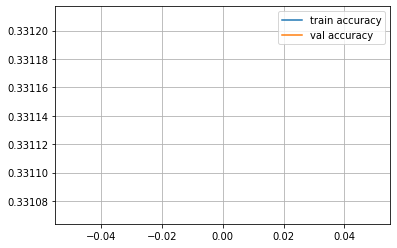

Epoch 1
Train accuracy: 0.33128025277101664
Val accuracy: 0.3313445485209542


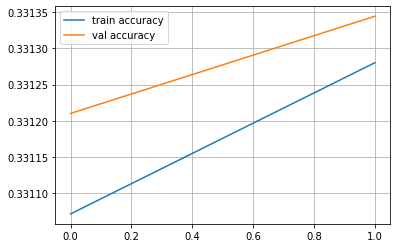

Epoch 2
Train accuracy: 0.33150426654602433
Val accuracy: 0.3314698245528889


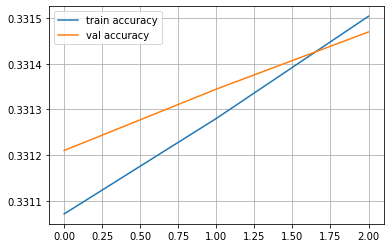

Epoch 3
Train accuracy: 0.33173266159970116
Val accuracy: 0.3315971632410396


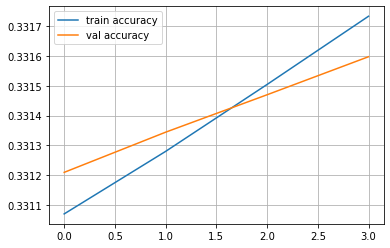

Epoch 4
Train accuracy: 0.33189838095699636
Val accuracy: 0.3317195879540877


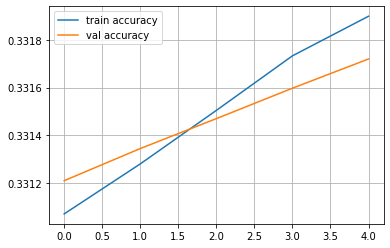

Epoch 5
Train accuracy: 0.3320791505081932
Val accuracy: 0.3318584532505035


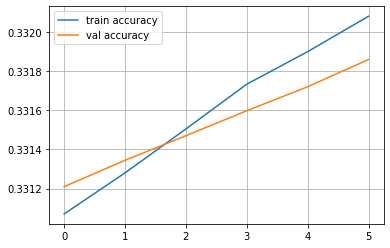

Epoch 6
Train accuracy: 0.3322398196893125
Val accuracy: 0.3319876725957922


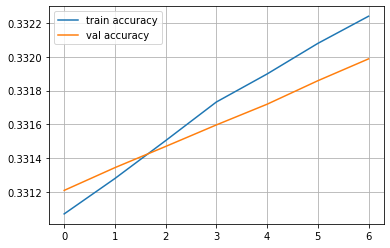

Epoch 7
Train accuracy: 0.3323863416881642
Val accuracy: 0.3321055473318935


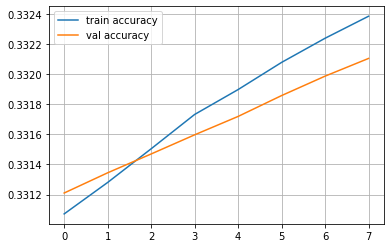

Epoch 8
Train accuracy: 0.332524836916935
Val accuracy: 0.33222421073066566


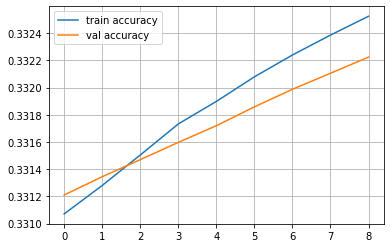

Epoch 9
Train accuracy: 0.33267617497783525
Val accuracy: 0.3323678686694654


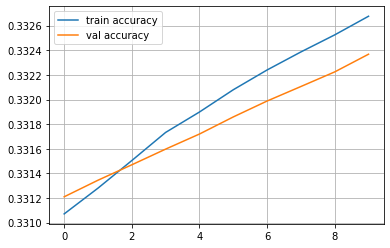

Epoch 10
Train accuracy: 0.33279915178444963
Val accuracy: 0.3325133465990439


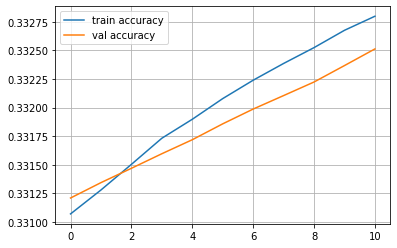

Epoch 11
Train accuracy: 0.33291778075727024
Val accuracy: 0.33262564003009054


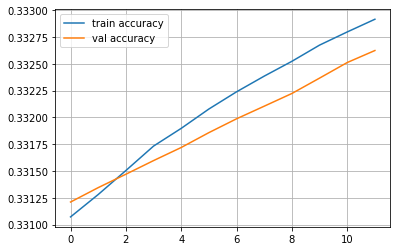

Epoch 12
Train accuracy: 0.33303380102981456
Val accuracy: 0.3327439394307069


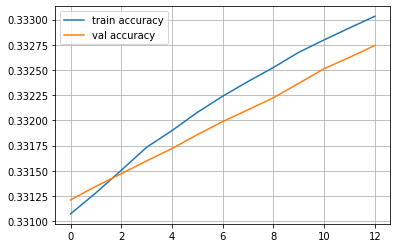

Epoch 13
Train accuracy: 0.3331506908691176
Val accuracy: 0.33283111698900725


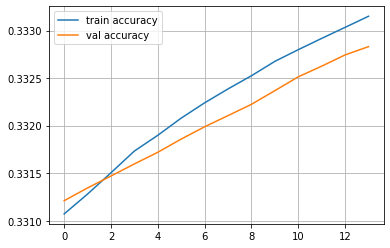

Epoch 14
Train accuracy: 0.33325450376216387
Val accuracy: 0.33293528112790893


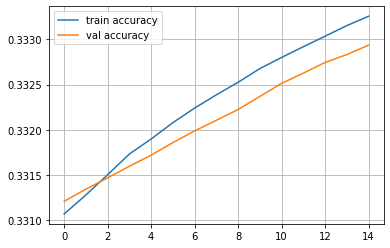

Epoch 15
Train accuracy: 0.3333450390397013
Val accuracy: 0.33302731199495256


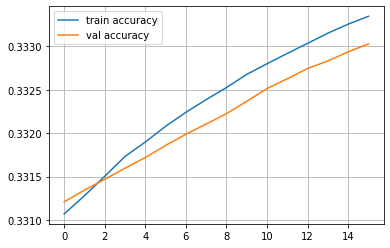

Epoch 16
Train accuracy: 0.3334356077621141
Val accuracy: 0.33309798830352594


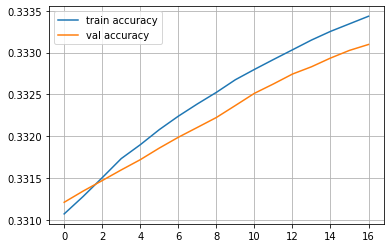

Epoch 17
Train accuracy: 0.33350279851666625
Val accuracy: 0.33318298187289186


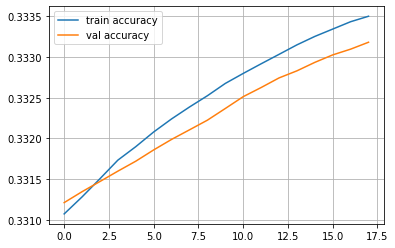

Epoch 18
Train accuracy: 0.3335821966507165
Val accuracy: 0.3332560241694775


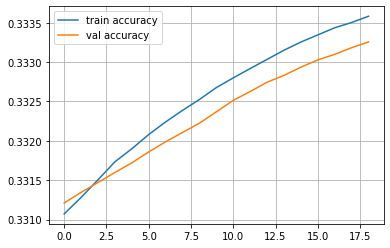

Epoch 19
Train accuracy: 0.3336572469509729
Val accuracy: 0.33332967312965617


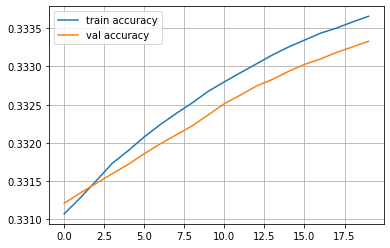

Epoch 20
Train accuracy: 0.3337147721365526
Val accuracy: 0.3334061734087214


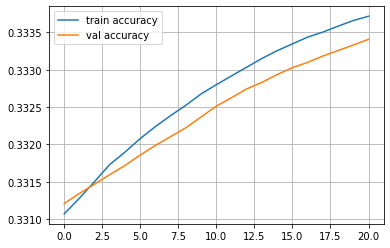

Epoch 21
Train accuracy: 0.33376514011881026
Val accuracy: 0.3334693270887428


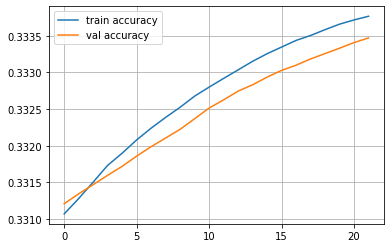

Epoch 22
Train accuracy: 0.33380644453985153
Val accuracy: 0.3335276881263802


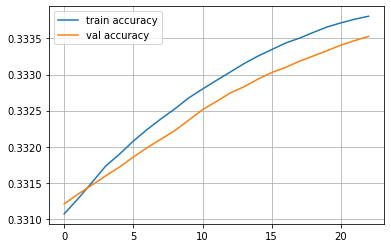

Epoch 23
Train accuracy: 0.33384985598803907
Val accuracy: 0.33358726249120335


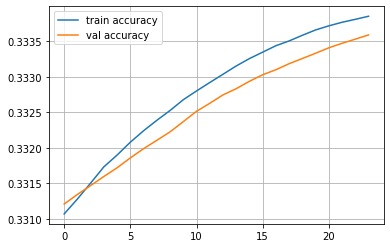

Epoch 24
Train accuracy: 0.33388694635478783
Val accuracy: 0.33363725157125873


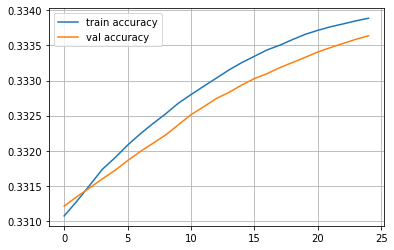

precision: 0.5007721640088741
recall: 0.5098102353483899
f1: 0.49454995707800364
accuracy: 0.5100985221674876
Confusion matrix: 
[[391 517 433]
 [303 704 366]
 [147 223 976]]


In [71]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

print(x_train.shape)

for epoch in range(25):
    network.fit(x_train, y_train[:,0])   
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])  
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test[:,0], y_pred, x_test_string)
eval.get_evaluation_report(analytic=False)

## Έτοιμο Multi-Layer Perceptron 

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής. 

In [70]:
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test[:,0], y_pred, x_test_string)
eval.get_evaluation_report(analytic=False)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


precision: 0.72648996035497
recall: 0.7189791957484103
f1: 0.7178272677639717
accuracy: 0.7194581280788177
Confusion matrix: 
[[ 811  307  223]
 [ 179 1057  137]
 [  60  233 1053]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Σύγκριση υλοποιήσεων 

  

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Συγκρίνετε τα αποτελέσματά σας τόσο ως προς τους χρόνους εκτέλεσης αλλά και ως προς τα αποτελέσματα. Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσματα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. 


Ορίζω τις παρακάτω συναρτήσεις για να με βοηθήσουν στη σύγκριση και λόγω της επαναληψιμότητας του κώδικα για τις διάφορες παραμέτρους.

In [76]:
from IPython.display import clear_output
import numpy as np

def my_MLP(layers, inputs, epochs):
  global x_train, y_train, x_test, y_test
  network = MLP(layers, len(inputs))
  train_log = []
  val_log = []
  for epoch in range(epochs):
    network.fit(x_train, y_train[:,0])   
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
  plt.figure()
  plt.plot(train_log,label = 'train accuracy')
  plt.plot(val_log,label = 'val accuracy')
  plt.legend(loc = 'best')
  plt.grid()
  plt.show()

  y_pred = network.predict(x_test)
  
  eval = Evaluate(y_test, y_pred, x_test_string)
  eval.get_evaluation_report(analytic=False)
  return eval.get_metrics()

def scikit_MLP(layers, inputs, epochs):
  global x_train, y_train, x_test, y_test
  mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter = epochs)
  mlp.fit(x_train,y_train)

  y_pred = mlp.predict(x_test)

  eval = Evaluate(y_test, y_pred, x_test_string)
  eval.get_evaluation_report(analytic=False)
  return eval.get_metrics()

### Για 25 epochs βλέπουμε τους εξής χρόνους και αποτελέσματα:

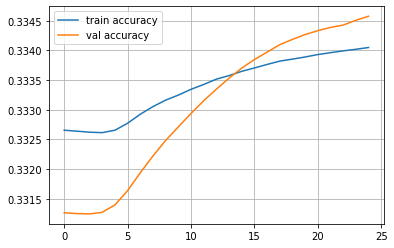

precision: 0.5749045049851859
recall: 0.5622737135423324
f1: 0.5455624034717467
accuracy: [0.5637931]
Confusion matrix: 
[[ 782  371  188]
 [ 162 1091  120]
 [ 300  630  416]]
CPU times: user 6.06 s, sys: 4.36 s, total: 10.4 s
Wall time: 5.69 s


In [78]:
%%time
my_MLP_25epochs = my_MLP(layers=[10,15,20,3], inputs=inputs, epochs=25)

In [79]:
%%time
scikit_25epochs = scikit_MLP(layers=(10, 15, 20), inputs=inputs, epochs=25)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


precision: 0.7304065787747933
recall: 0.7176204752521523
f1: 0.7162693045286352
accuracy: [0.7182266]
Confusion matrix: 
[[ 786  334  221]
 [ 154 1077  142]
 [  44  249 1053]]
CPU times: user 1.18 s, sys: 95.9 ms, total: 1.28 s
Wall time: 1.18 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### Για 100 epochs:

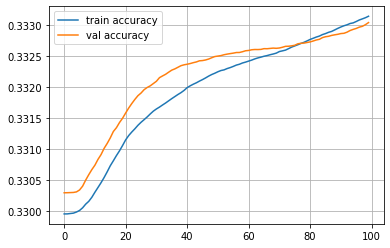

precision: 0.6165885128649723
recall: 0.6184961500887369
f1: 0.6159884529522986
accuracy: [0.61773399]
Confusion matrix: 
[[941 184 216]
 [384 713 276]
 [184 308 854]]
CPU times: user 23.3 s, sys: 17.1 s, total: 40.4 s
Wall time: 21.8 s


In [81]:
%%time
my_MLP_100epochs = my_MLP(layers=[10,15,20,3], inputs=inputs, epochs=100)

In [82]:
%%time
scikit_100epochs = scikit_MLP(layers=(10, 15, 20), inputs=inputs, epochs=100)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


precision: 0.7494822361121476
recall: 0.7396781127493158
f1: 0.7402409122388883
accuracy: [0.74014778]
Confusion matrix: 
[[ 873  312  156]
 [ 165 1090  118]
 [  62  242 1042]]
CPU times: user 3.97 s, sys: 71.4 ms, total: 4.04 s
Wall time: 3.97 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### Mε περισσότερους νευρώνες στα layers, με 25 epochs:

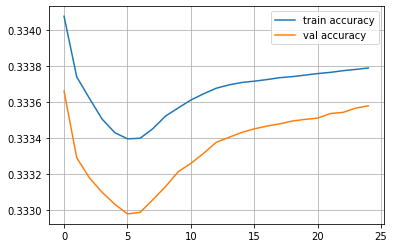

precision: 0.6604080777307796
recall: 0.6322668312036966
f1: 0.6307854097225701
accuracy: [0.63226601]
Confusion matrix: 
[[ 690  289  362]
 [ 141  838  394]
 [  22  285 1039]]
CPU times: user 9.67 s, sys: 6.27 s, total: 15.9 s
Wall time: 8.52 s


In [84]:
%%time
my_MLP_100epochs = my_MLP(layers=[50,75,100,3], inputs=inputs, epochs=25)

In [83]:
%%time
scikit_25epochs = scikit_MLP(layers=(50,75,100), inputs=inputs, epochs=25)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


precision: 0.7439968682745067
recall: 0.7381067057882963
f1: 0.739077751217717
accuracy: [0.73842365]
Confusion matrix: 
[[ 922  286  133]
 [ 197 1066  110]
 [ 109  227 1010]]
CPU times: user 4.47 s, sys: 2.77 s, total: 7.23 s
Wall time: 3.72 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### Συμπεράσματα για MLP

Για τη δικη μας υλοποίηση του MLP παρατηρώ τα εξής:
> **Για 100 epochs** τα metrics μας είναι καλύτερα.
> Ο χρόνος που χρειάστηκε ήταν περίπου τετραπλάσιος από ότι για 25 κάτι που μας υποψιάζει για ενδεχόμενη αναλογία χρόνου - epochs. 

> **Mε περισσότερους νευρώνες** (πενταπλάσιους) οι μετρικές μας βελτιώνονται ακόμα περισσότερο από ότι με τα 100 epochs.
> ο χρόνος εκτέλεσης πενταπλασιάστηκε , παρατηρείται δηλαδή πάλι μία αναλογία. 

Για το MLP του scikit:
> Έχουμε αναλογία χρόνου - epochs , χρόνου - νευρώνων.

> Οι μετρικές βελτιώνονται αλλά όχι με τους ίδιους ρυθμούς που βελτιώνονται για τη δική μας υλοποιήση.

# Αξιολόγηση- Συμπεράσματα 

  

Τέλος στο σημείο αυτό καλείστε να αξιολογήσετε τις διάφορες τεχνικές ταξινόμησης (KNN, Naive Bayes, MLP), τα αποτελέσματά τους, τους χρόνους εκτέλεσης, και να παραθέσετε παρατηρήσεις καθώς και οτιδήποτε σας φάνηκε ενδιαφέρον ή ιδιαίτερο. 



* KNN classifier:
> Οι μετρικές που είχαμε στον ΚΝΝ είναι καλές , από 60-70%. \\
> Μεγάλοι χρόνοι εκτέλεσης σε σχέση με τις υπόλοιπες μεθόδους. \\
> Σχετικά εύκολη υλοποίηση και ευκολία στην επίτευξη υψηλής απόδοσης , δηλαδή κοντά στον ΚΝΝ του scikit.

* Naive Bayes:
> Οι μετρικές που είχαμε στον Naive Bayes ήταν της τάξης του 70% και λίγο παραπάνω. \\
> Συγκεκριμένα χρησιμοποιώντας 20 κλάσεις(διαστήματα) καταφέραμε να έχουμε καλύτερες μετρικές από τον Gaussian Naive Bayes της scikit-learn. \\
> O Naive Bayes ήταν ο πιο γρήγορος classifier. \\
> H υλοποίηση του κατα την άποψη μου ήταν δυσκολότερη από του ΚΝΝ, αλλα έιχαμε πολύ καλές επιδόσεις.

* MLP:
> Στη συγκεκριμένη μέθοδο πέτυχα τις χαμηλότερες μετρικές , που όμως με την αύξηση των epochs και των νευρώνων βελτιώθηκαν από το 0.5 στο 0.64 περίπου. 
> Ο MLP της scikit-learn επιτυγχάνει σχετικά εύκολα με μέτριο χρόνο εκτέλεσης μετρικές της τάξης του 0.7+.
> Η υλοποίηση απαιτεί βαθύτερη κατανόηση του αλγορίθμου από οτι οι υπόλοιπες μέθοδοι. 

* **Βέλτιστος classifier**
> Ως τον βέλτιστο classifier θα επέλεγα τόσο τον ΚΝΝ με euclidean απόσταση και k=50, αφού έχει ίδιες σχεδόν μετρικές με τον αντιστοιχο της scikit-learn. Αλλά και τον Naive Bayes με 20 διαστήματα , ο οποίος ξεπέρασε σε επιδόσεις τον αντίστοιχο της scikit-learn.
